# データの読み込み

In [1]:
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skorch
import pandas as pd
import sklearn
import csv
import os

# ランダムシード固定

In [2]:
torch.manual_seed(42)
np.random.seed(42)

In [3]:
DATA_FOLDER = '/home/tamaru/scene_categorize/main/data/dataset/'
df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'), names=["img_path", "l_class", 's_class'])
df_test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'), names=["img_path", "l_class", 's_class'])
df_light = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'), names=["img_path", "l_class", 's_class'])

In [4]:
df_train = df_train.drop(["l_class"], axis=1)
df_test = df_test.drop(["l_class"], axis=1)
df_light = df_light.drop(["l_class"], axis=1)

In [5]:
df_train.groupby('s_class').count()

,img_path
s_class,
lab,54
professorroom,36


In [6]:
df_test.groupby("s_class").count()

,img_path
s_class,
lab,30
professorroom,25


In [7]:
df_light.groupby("s_class").count()

,img_path
s_class,
lab,30
professorroom,25


In [8]:
df_train = pd.concat([df_train, df_light], axis=0)

In [9]:
num_class = len(df_train.s_class.unique())
num_class

2

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder() 
le.fit(df_train.s_class) 
df_train["labels"] = le.transform(df_train.s_class) 
df_train.groupby('labels')

In [12]:
cor_table = df_train.groupby('labels').s_class.unique() 
cor_table = pd.DataFrame(cor_table) 
cor_table

,s_class
labels,
0,[lab]
1,[professorroom]


In [13]:
df_train = df_train.drop(['s_class'], axis=1)
df_train

,img_path,labels
0,/home/tamaru/scene_categorize/main/data/datase...,0
1,/home/tamaru/scene_categorize/main/data/datase...,0
2,/home/tamaru/scene_categorize/main/data/datase...,0
3,/home/tamaru/scene_categorize/main/data/datase...,0
4,/home/tamaru/scene_categorize/main/data/datase...,0
5,/home/tamaru/scene_categorize/main/data/datase...,0
6,/home/tamaru/scene_categorize/main/data/datase...,0
7,/home/tamaru/scene_categorize/main/data/datase...,0
8,/home/tamaru/scene_categorize/main/data/datase...,0
9,/home/tamaru/scene_categorize/main/data/datase...,0


In [14]:
le.fit(df_test.s_class) 
df_test["labels"] = le.transform(df_test.s_class) 
df_test.groupby('labels')

In [15]:
df_test = df_test.drop(['s_class'], axis=1)
df_test

,img_path,labels
0,/home/tamaru/scene_categorize/main/data/datase...,0
1,/home/tamaru/scene_categorize/main/data/datase...,0
2,/home/tamaru/scene_categorize/main/data/datase...,0
3,/home/tamaru/scene_categorize/main/data/datase...,0
4,/home/tamaru/scene_categorize/main/data/datase...,0
5,/home/tamaru/scene_categorize/main/data/datase...,0
6,/home/tamaru/scene_categorize/main/data/datase...,0
7,/home/tamaru/scene_categorize/main/data/datase...,0
8,/home/tamaru/scene_categorize/main/data/datase...,0
9,/home/tamaru/scene_categorize/main/data/datase...,0


In [16]:
#画像の前処理を定義
data_transforms = {
    'data': transforms.Compose([
        transforms.Resize(224), #いらない
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
}
#正規化をしない処理
to_tensor_transforms = transforms.Compose([
    transforms.Resize(224), #いらない
    transforms.ToTensor()
])

In [17]:
class CustomDataset(torch.utils.data.Dataset):
        
    def __init__(self, dataframe, root_dir, transform=None):
        #前処理クラスの指定
        self.transform = transform
        #pandasでcsvデータの読み出し
        #画像とラベルの一覧を保持するリスト
        self.images = np.array(dataframe.img_path).tolist()
        self.labels = np.array(dataframe.labels).tolist()
        self.root_dir = root_dir
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.labels[idx]
        img = self.images[idx]
        #画像の読み込み
        with open(img, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
        #画像への処理
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [18]:
train_set = CustomDataset(dataframe=df_train, root_dir="../data/dataset/train", transform=data_transforms['data'])
test_set = CustomDataset(dataframe=df_test, root_dir="../data/dataset/test", transform=data_transforms['data'])

In [19]:
# DataLoaderのcollate_fnはバッチ内のtensorのshapeをすべて同じにする必要がある
# 自分で指定してエラーが起きないようにする
def my_collate_fn(batch):
    # datasetの出力が
    # [image, target] = dataset[batch_idx]
    # の場合.
    images = []
    labels = []
    for image, label in batch:
        images.append(image)
        labels.append(label)
    images = torch.stack(images,dim=0)
    return images, labels

In [20]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16, shuffle=False, num_workers=6)

# ネットワークの定義
vgg16 finetuning

In [21]:
import torchvision.models as models

In [22]:
num_classes = num_class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = models.vgg16(pretrained=True, progress=True)

In [23]:
#パラメータ凍結と採取層クラス数変更
for param in net.parameters():
    param.requires_grad = False
#最終層をnum_s_classクラス用に変更
num_ftrs = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features=num_ftrs, out_features=num_classes).to(device)
#最適化関数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.classifier[6].parameters())
net = net.to(device)
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#学習率の変更
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=)

# 学習の実行

In [24]:
#Cross Validationを行いたい...
#Early Stopping を行いたい

num_epochs = 30
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #view()での変換をしない
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_train_acc = train_acc/len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            #view()での変換をしない
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1]==labels).sum().item()
   
    avg_val_loss = val_loss/len(test_loader.dataset)
    avg_val_acc = val_acc/len(test_loader.dataset)
    
    print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
    
    #Early_stopping
    if epoch >= 3:
        if val_loss_list[-1]>val_loss_list[-2] and val_loss_list[-2]>val_loss_list[-3]:
            break
    num_epoch = epoch + 2

Epoch [1/30], Loss: 0.0559, val_loss: 0.0249, val_acc: 0.8727
Epoch [2/30], Loss: 0.0253, val_loss: 0.0150, val_acc: 0.9818
Epoch [3/30], Loss: 0.0194, val_loss: 0.0134, val_acc: 0.9636
Epoch [4/30], Loss: 0.0191, val_loss: 0.0101, val_acc: 0.9818
Epoch [5/30], Loss: 0.0154, val_loss: 0.0099, val_acc: 0.9818
Epoch [6/30], Loss: 0.0110, val_loss: 0.0073, val_acc: 0.9818
Epoch [7/30], Loss: 0.0118, val_loss: 0.0069, val_acc: 1.0000
Epoch [8/30], Loss: 0.0100, val_loss: 0.0062, val_acc: 0.9818
Epoch [9/30], Loss: 0.0099, val_loss: 0.0047, val_acc: 1.0000
Epoch [10/30], Loss: 0.0066, val_loss: 0.0052, val_acc: 1.0000
Epoch [11/30], Loss: 0.0069, val_loss: 0.0040, val_acc: 1.0000
Epoch [12/30], Loss: 0.0074, val_loss: 0.0032, val_acc: 1.0000
Epoch [13/30], Loss: 0.0071, val_loss: 0.0036, val_acc: 1.0000
Epoch [14/30], Loss: 0.0058, val_loss: 0.0031, val_acc: 1.0000
Epoch [15/30], Loss: 0.0059, val_loss: 0.0024, val_acc: 1.0000
Epoch [16/30], Loss: 0.0062, val_loss: 0.0024, val_acc: 1.0000
E

# train, validationのloss acc のグラフを作成

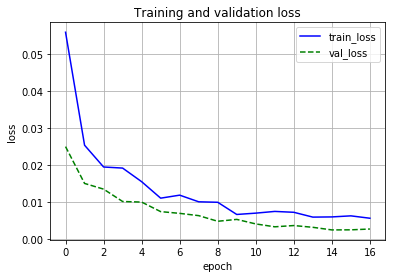

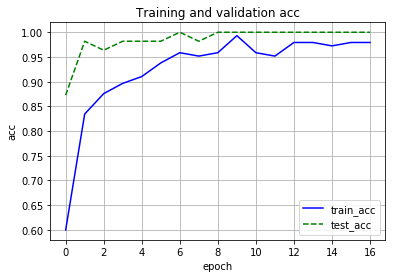

In [25]:
plt.figure()
plt.plot(range(num_epoch), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epoch), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epoch), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epoch), val_acc_list, color='green', linestyle='--', label='test_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation acc')
plt.grid()

# Confusion Matrix

In [26]:
net = net.eval()

In [27]:
pred = []
Y = []
for i, (x,y) in enumerate(test_loader):
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)
        output = net(x)
    pred += [int(l.argmax()) for l in output]
    Y += [int(l) for l in y]
print("Pred:", pred)
print("Y:", Y)

Pred: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Y: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

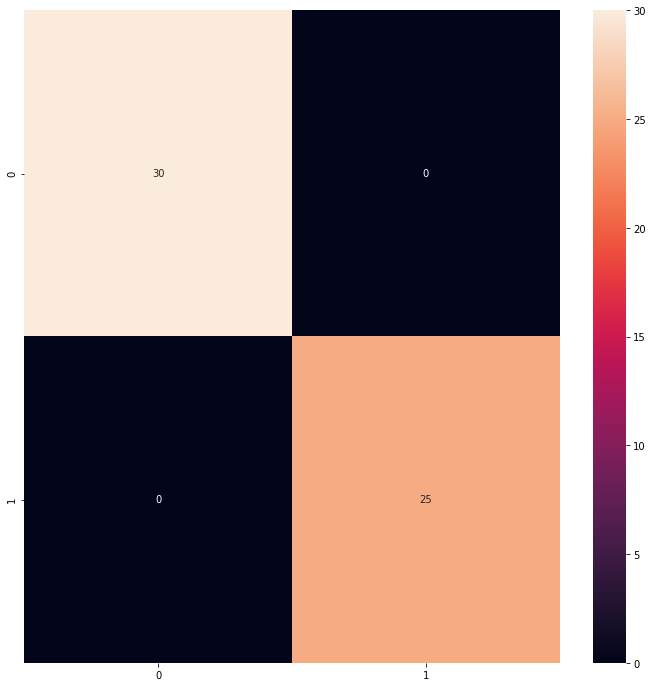

accuracy: 1.0


In [29]:
cmx = confusion_matrix(Y, pred)
plt.figure(figsize=(12,12))
sns.heatmap(cmx, annot=True)
plt.show()
print('accuracy: {}'.format(accuracy_score(Y, pred)))

In [30]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [31]:
print(cor_table)

                s_class
labels                 
0                 [lab]
1       [professorroom]


In [32]:
plt.figure(figsize=(200,200))
for i in range(len(pred)):
    if(pred[i]!=Y[i]):
        image = Image.open(df_test.img_path[i])
        plt.subplot(len(pred), 1, i+1)
        plt.imshow(image)

<Figure size 14400x14400 with 0 Axes>